## Author : Rohan Bura

### **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Statsmodels and Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

#### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Step 1: Reading the Data
Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
# import the required packages to load the data 
import pandas as pd
import numpy as np

In [2]:
url = "http://bit.ly/w-data"    # url for fetching the data 

df = pd.read_csv(url)    # loading the data

df.head()   # top 5 rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape    # Checking the shape of data

(25, 2)

In [4]:
df.info()    # Checking the information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking the null values in the data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

- `We can see there are no null values in the data.`

In [6]:
df.describe().T     # Statistical Description of Data 

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Step 2: Visualising the Data

- Let's now visualise our data using matplotlib and seaborn. 

In [7]:
# import the required packages to Visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

####  1. Let's find the correlation between Hours and Score by using Scatterplot

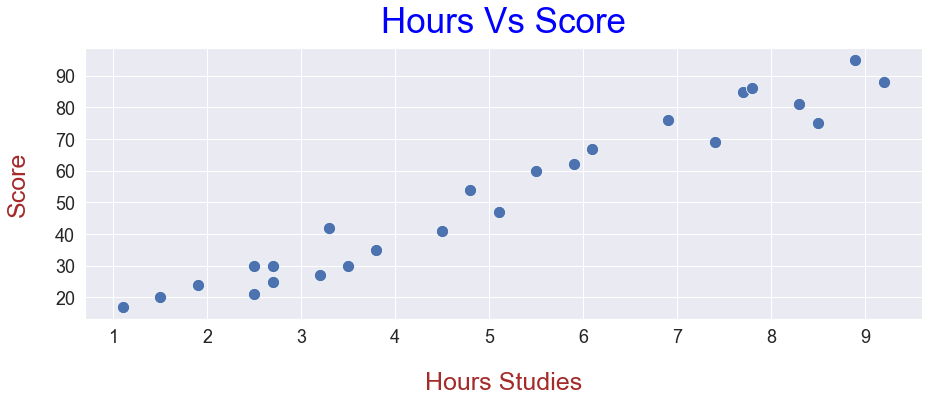

In [8]:
plt.figure(figsize=(15,5))
sns.scatterplot(df.Hours, df.Scores, color = 'b', s = 150)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Hours Vs Score', fontsize = 35, color = 'blue', pad = 15)
plt.xlabel('Hours Studies', fontsize = 25, color = 'brown', labelpad = 25)
plt.ylabel('Score', fontsize = 25, color = 'brown', labelpad = 25)
plt.show()

- `We can see there is positive correlation between Hours Studied and Scores obtained.`

#### 2. Let's find the correlation between Hours and Score by using heatmap

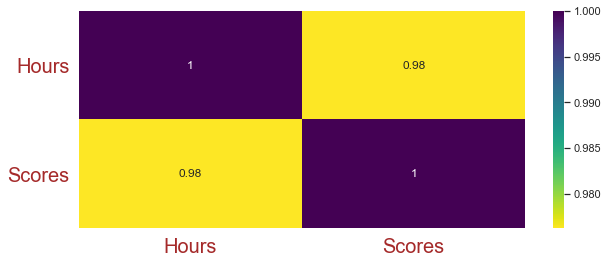

In [9]:
plt.figure(figsize = (10,4))
sns.heatmap(df.corr(), cmap="viridis_r", annot = True)
plt.xticks(fontsize = 20, color = 'brown')
plt.yticks(fontsize = 20, color = 'brown', rotation = 0)
plt.show()

- `We can see there is high positive correlation between Hours Studied and Scores obtained.`

#### 3. Let's find the outliers in Hours data by using Boxplot

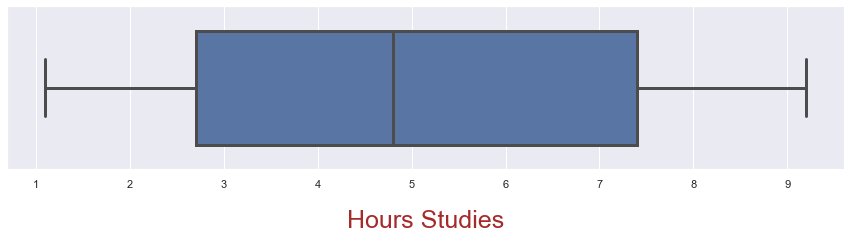

In [10]:
plt.figure(figsize=(15,3))
sns.boxplot(df.Hours, width = 0.7, linewidth = 3)
plt.xlabel('Hours Studies', fontsize = 25, color = 'brown', labelpad = 20)
plt.show()

- `We can see there are no oultiers found in Hours data.`

#### 4. Let's find the outliers in Scores data using Boxplot

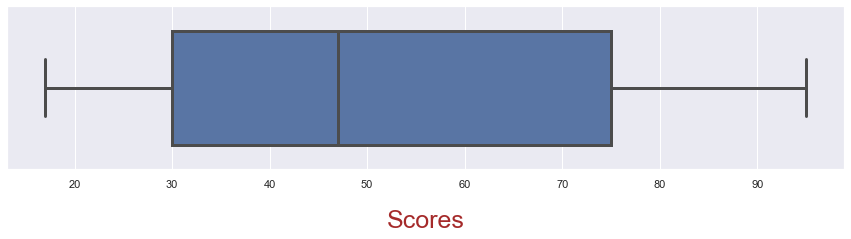

In [11]:
plt.figure(figsize=(15,3))
sns.boxplot(df.Scores, width = 0.7, linewidth = 3)
plt.xlabel('Scores', fontsize = 25, color = 'brown', labelpad = 20)
plt.show()

- `We can see there are no oultiers found in Scores data.`

### Step 3: Data Pre-Processing

In [12]:
# Assign independent variable to X i.e Hours and Assign dependent variable to y i.e Scores
X = df['Hours']
y = df['Scores']

In [13]:
# Divide the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 100)

print('X_train Shape :', X_train.shape,'\n')     # Checking shape of X_train Data
print('X_test Shape : ', X_test.shape,'\n')      # Checking shape of X_test Data
print('y_train Shape : ', y_train.shape,'\n')    # Checking shape of y_train Data
print('y_train Shape : ', y_test.shape,'\n')    # Checking shape of y_test Data

X_train Shape : (20,) 

X_test Shape :  (5,) 

y_train Shape :  (20,) 

y_train Shape :  (5,) 



### Step 4: Building a Linear Model

#### 1. First we will build linear model using statsmodels package

In [14]:
# lets import statsmodels package
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to use the `add_constant` attribute of `statsmodels` manually. And once we have added the constant to our `X_train` dataset, we can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

In [15]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

pd.DataFrame(X_train_sm).head()

,const,Hours
19,1.0,7.4
23,1.0,6.9
21,1.0,4.8
6,1.0,9.2
12,1.0,4.5


In [16]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [17]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.989423
Hours    9.835444
dtype: float64

In [18]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     356.7
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.59e-13
Time:                        11:21:28   Log-Likelihood:                -62.724
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9894      3.106      0.641      0.5

####  Looking at some key statistics from the summary
The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for Hours is 9.8354, with a very low p value
- The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.952
- Meaning that 95.2% of the variance in `Scores` is explained by `Hours`. This is a very good R-squared value.

###### 3. F statistic has a very low p value (practically low)
- Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

- **The fit is significant**. Let's visualize how well **the model fit the train data**.

- From the parameters that we get, our linear regression equation becomes:

$ Score = 1.9894 + 9.8354 \times Hours $ 
- Let's plot the scatterplot using seaborn and matplotlib.

#### `Visualizing the fit on train data.`

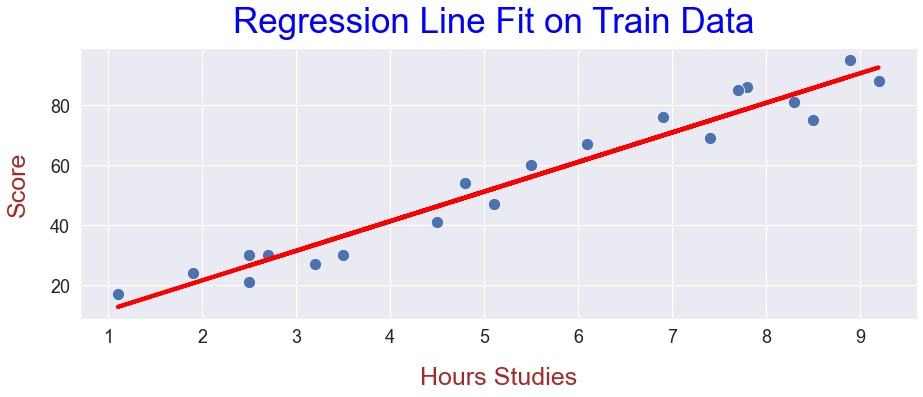

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(X_train, y_train, s = 150)
plt.plot(X_train, 1.9894 + 9.8354*X_train, 'red', linewidth = 4)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Regression Line Fit on Train Data ', fontsize = 35, color = 'blue', pad = 15)
plt.xlabel('Hours Studies', fontsize = 25, color = 'brown', labelpad = 20)
plt.ylabel('Score', fontsize = 25, color = 'brown', labelpad = 20)
plt.show()

- **We can see here the model has fiited best fit regression line on train data.**

#### `Predictions on the Test Set`
Now we have fitted a regression line on the train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the `X_test` data like we did for `X_train` and then we can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [20]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
pd.DataFrame(X_test_sm).head()

,const,Hours
9,1.0,2.7
22,1.0,3.8
13,1.0,3.3
11,1.0,5.9
5,1.0,1.5


In [21]:
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})

,Actual,Prediction
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


#### `Evaluation on the Test Set`

In [22]:
# importing required metrics module from sklearn package
from sklearn.metrics import mean_squared_error, r2_score

- `Checking RSME on test data`

In [23]:
# we will take square root of mean sqaured error
print(f'Root Mean Squared Error : {np.sqrt(mean_squared_error(y_test, y_pred))}')

Root Mean Squared Error : 4.543287018366107


- `Checking R-Squared on test data`

In [24]:
r_squared = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error : {r_squared}')

Root Mean Squared Error : 0.9050356232459791


#### `Visualizing the fit on the test set`

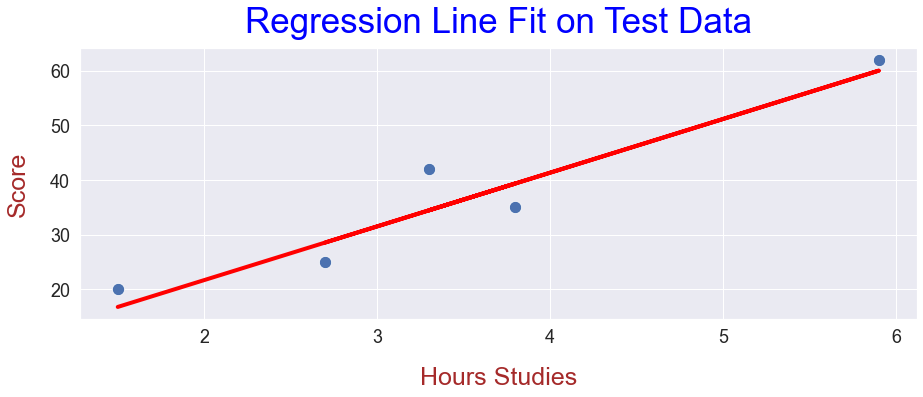

In [25]:
plt.figure(figsize=(15,5))
sns.scatterplot(X_test, y_test, s = 150)
plt.plot(X_test, 1.9894 + 9.8354*X_test, 'red', linewidth = 4)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Regression Line Fit on Test Data', fontsize = 35, color = 'blue', pad = 15)
plt.xlabel('Hours Studies', fontsize = 25, color = 'brown', labelpad = 20)
plt.ylabel('Score', fontsize = 25, color = 'brown', labelpad = 20)
plt.show()

- **We can see here the model has fiited best fit regression line on test data.**

#### 2. Now let's build Linear Regression Model using `linear_model` in `sklearn` package

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` module from `sklearn` package to build the model. Since, we have already performed a train-test split, we don't need to do it again.

In [26]:
# reshape the X_train and X_test data
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [27]:
# Using Linear Regression to train the data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Lets find the Coefficients and Intercept of Best Fit Line fitted by the Linear Regression Model 
print(f'Coefficient : {lin_reg.coef_}')
print(f'Intercept : {lin_reg.intercept_}')

Coefficient : [9.83544438]
Intercept : 1.9894231109746912


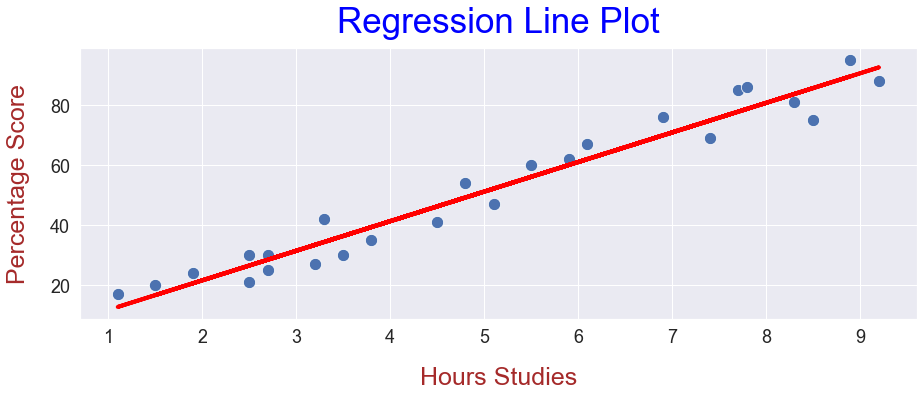

In [29]:
# Plotting the regression line
reg_line = 9.83544438 * X + 1.9894231109746912

# Plotting for the test data
plt.figure(figsize = (15,5))
sns.scatterplot(df.Hours, y,  color = 'b', s = 150)
plt.plot(X, reg_line, linewidth = 4, color = 'red')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Regression Line Plot", fontsize = 35, color = 'blue', pad = 15)
plt.xlabel('Hours Studies', fontsize = 25, color = 'brown', labelpad = 20)
plt.ylabel('Percentage Score', fontsize = 25, color = 'brown', labelpad = 20)
plt.show()

#### `Prediction on test set`

- Let's predict the results on test data by using `Predict Attribute`.

In [30]:
y_pred = lin_reg.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

,Actual,Prediction
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


### Step 5: Prediction on New Value 
**Let's predict the scores if the no. of hours study is 9.25 hours/day** by using `Predict Attribute`

In [31]:
hours = 9.25

prediction = lin_reg.predict(np.array(hours).reshape(-1,1))

print(f'No. of Hours studied  : {hours} hours/day \n')
print(f'Predicted Score = {prediction[0]} marks')

No. of Hours studied  : 9.25 hours/day 

Predicted Score = 92.96728365185982 marks


In [32]:
# importing the metrics module from sklearn package
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_pred)} \n')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_pred)} \n')
print(f'R-Squared : {r2_score(y_test, y_pred)}')

Mean Absolute Error : 4.140342096254413 

Mean Squared Error : 20.641456931253995 

R-Squared : 0.9050356232459791
